<a href="https://colab.research.google.com/github/Taghr66d/MSc-SummerProject2025/blob/main/3rd_CNN_for_Cusps(SNR20_50).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X_cusp = np.load("/content/drive/MyDrive/Cusp Data/X_cusp_10k(SNR20-50).npy")
y_cusp = np.load("/content/drive/MyDrive/Cusp Data/y_cusp_10k(SNR20-50).npy")
X_blip = np.load("/content/drive/MyDrive/Cusp Data/X_blip_10k(SNR20-50).npy")
y_blip = np.load("/content/drive/MyDrive/Cusp Data/y_blip_10k(SNR20-50).npy")

print(X_cusp.shape, y_cusp.shape, X_blip.shape, y_blip.shape)


(10000, 1024) (10000,) (10000, 1024) (10000,)


In [4]:

X_total = np.vstack((X_cusp, X_blip))
y_total = np.concatenate((y_cusp, y_blip))
X_total = X_total[..., np.newaxis]  ### shape(20000, 1024, 1)

In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_total, y_total = shuffle(X_total, y_total, random_state=42)

X_train, X_temp, y_train, y_temp = train_test_split(X_total, y_total, test_size=0.3, stratify=y_total, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(32, 7, activation='relu', input_shape=(1024, 1)),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(64, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),

    GlobalAveragePooling1D(),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 1018, 32)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 1018, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 509, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 505, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 505, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 252, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,169 (59.25 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 192 (768.00 B)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 52s 218ms/step - accuracy: 0.9288 - loss: 0.2599 - val_accuracy: 1.0000 - val_loss: 0.2408
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 86s 239ms/step - accuracy: 0.9999 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 81s 233ms/step - accuracy: 1.0000 - loss: 5.8640e-04 - val_accuracy: 1.0000 - val_loss: 7.7286e-04
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 80s 224ms/step - accuracy: 1.0000 - loss: 3.6572e-04 - val_accuracy: 1.0000 - val_loss: 3.3979e-05
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 79s 209ms/step - accuracy: 1.0000 - loss: 2.7394e-04 - val_accuracy: 1.0000 - val_loss: 4.6349e-05


In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 1.0000 - loss: 3.4377e-05
Test Accuracy: 1.0000


In [30]:
from collections import Counter
print(Counter(y_test))

#CNN robustness --> Gaussian noise

for std in [0.01, 0.1, 0.5, 1.5, 1.0, 2.0]:
    X_test_noisy = X_test + np.random.normal(0, std, X_test.shape)

    #normalize
    X_test_noisy = (X_test_noisy - np.mean(X_test_noisy, axis=1, keepdims=True)) / np.std(X_test_noisy, axis=1, keepdims=True)

    loss, acc = model.evaluate(X_test_noisy, y_test, verbose=0)
    print(f"Noise at {std:.2f}: Accuracy = {acc:.4f}")

Counter({np.float64(1.0): 1500, np.float64(0.0): 1500})
Noise at 0.01: Accuracy = 1.0000
Noise at 0.10: Accuracy = 1.0000
Noise at 0.50: Accuracy = 1.0000
Noise at 1.50: Accuracy = 0.6920
Noise at 1.00: Accuracy = 0.9950
Noise at 2.00: Accuracy = 0.5067


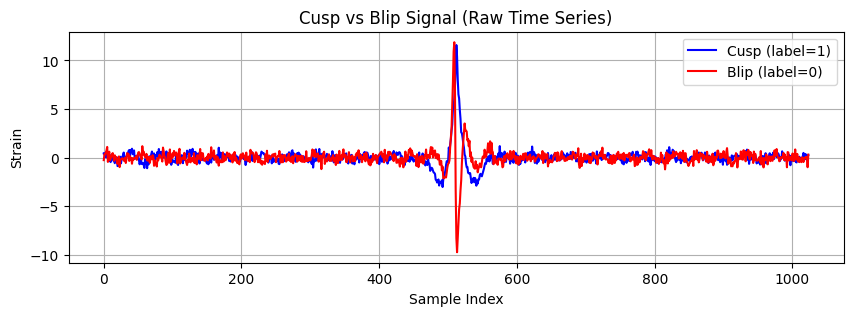

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(X_cusp[1], label='Cusp (label=1)', color='b')
plt.plot(X_blip[1], label='Blip (label=0)', color='r')
plt.title("Cusp vs Blip Signal (Raw Time Series)")
plt.xlabel("Sample Index")
plt.ylabel("Strain")
plt.legend()
plt.grid(True)
plt.show()


# Check: